In [1]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr') # working directory should be pm4py-dcr (the one behind notebooks)
print(os.getcwd())

/home/vco/Projects/pm4py-dcr/notebooks
/home/vco/Projects/pm4py-dcr


In [3]:
import pm4py
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

from copy import deepcopy
from scipy import stats
from pm4py.algo.discovery.dcr_discover import algorithm as alg
from pm4py.objects.dcr.exporter import exporter as dcr_exporter

# Mine with SpT-DisCoveR

# Sepsis

In [25]:
event_log_file = '/home/vco/Datasets/Sepsis Cases - Event Log.xes'
dcrxml_file = 'models/sepsis_sp.xml'
dcr_title = 'Sepsis Cases'
event_log = pm4py.read_xes(event_log_file, return_legacy_log_object=True)
reference_event_log = deepcopy(event_log)
sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path=dcrxml_file,
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: No self ancestors")

sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True,discardSelfInPredecessors=False)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path='models/sepsis_subprocess_with_self_ancestors.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: With self ancestors")

reference_dcr = alg.apply(reference_event_log,alg.DCR_BASIC,findAdditionalConditions=True)
dcr_exporter.apply(dcr_graph=reference_dcr,
                   path='models/sepsis_discover.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="Basic DisCoveR")

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 2420.08it/s]
/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [26]:
#time
spt_dcr = alg.apply(input_log=event_log,
                    variant=alg.DCR_SUBPROCESS_TIMED,
                    findAdditionalConditions=True,
                    discardSelfInPredecessors=True,
                    timed=True)

RESPONSE
CONDITION
['ER Triage', 'Admission IC']
['ER Registration', 'Admission IC']
['ER Triage', 'Admission NC']
['ER Registration', 'Admission NC']
['ER Triage', 'S0']
['ER Registration', 'S0']
['Admission IC', 'Return ER']
['Admission NC', 'Return ER']
['S0', 'Return ER']
['ER Sepsis Triage', 'IV Antibiotics']


In [27]:
spt_dcr

{'events': {'Admission IC',
  'Admission NC',
  'CRP',
  'ER Registration',
  'ER Sepsis Triage',
  'ER Triage',
  'IV Antibiotics',
  'IV Liquid',
  'LacticAcid',
  'Leucocytes',
  'Return ER',
  'S0'},
 'conditionsFor': {'ER Sepsis Triage': set(),
  'IV Liquid': set(),
  'Admission IC': {'ER Registration', 'ER Triage'},
  'ER Triage': set(),
  'Admission NC': {'ER Registration', 'ER Triage'},
  'S0': {'ER Registration', 'ER Triage'},
  'Leucocytes': set(),
  'ER Registration': set(),
  'Return ER': {'Admission IC', 'Admission NC', 'S0'},
  'LacticAcid': set(),
  'CRP': set(),
  'IV Antibiotics': {'ER Sepsis Triage'}},
 'milestonesFor': {'ER Sepsis Triage': set(),
  'IV Liquid': set(),
  'Admission IC': set(),
  'ER Triage': set(),
  'Admission NC': set(),
  'S0': set(),
  'Leucocytes': set(),
  'ER Registration': set(),
  'Return ER': set(),
  'LacticAcid': set(),
  'CRP': set(),
  'IV Antibiotics': set()},
 'responseTo': {'ER Sepsis Triage': set(),
  'IV Liquid': set(),
  'Admission

# BPIC 2017

In [28]:
event_log_file = '/home/vco/Datasets/BPI Challenge 2017 - Offer log.xes'
dcrxml_file = 'models/bpic2017_sp.xml'
dcr_title = 'BPIC2017'
event_log = pm4py.read_xes(event_log_file, return_legacy_log_object=True)
reference_event_log = deepcopy(event_log)
sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path=dcrxml_file,
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: No self ancestors")
sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True, discardSelfInPredecessors=False)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path='models/bpic2017_sp_with_self_ancestors.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: With self ancestors")
reference_dcr = alg.apply(reference_event_log,alg.DCR_BASIC,findAdditionalConditions=True)
dcr_exporter.apply(dcr_graph=reference_dcr,
                   path='models/bpic2017_discover.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="Basic DisCoveR")

parsing log, completed traces :: 100%|██████████| 42995/42995 [00:08<00:00, 4940.11it/s]
/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [29]:
#time
spt_dcr = alg.apply(input_log=event_log,
                    variant=alg.DCR_SUBPROCESS_TIMED,
                    findAdditionalConditions=True,
                    discardSelfInPredecessors=True,
                    timed=True)

RESPONSE
['O_Create Offer', 'O_Created']
CONDITION
['O_Created', 'S0']
['O_Create Offer', 'O_Created']
['O_Created', 'S1']
['S1', 'O_Returned']


In [30]:
spt_dcr

{'events': {'O_Create Offer', 'O_Created', 'O_Returned', 'S0', 'S1'},
 'conditionsFor': {'S0': {'O_Created'},
  'O_Created': {'O_Create Offer'},
  'S1': {'O_Created'},
  'O_Create Offer': set(),
  'O_Returned': {'S1'}},
 'milestonesFor': {'S0': set(),
  'O_Created': set(),
  'S1': set(),
  'O_Create Offer': set(),
  'O_Returned': set()},
 'responseTo': {'S0': set(),
  'O_Created': set(),
  'S1': set(),
  'O_Create Offer': {'O_Created'},
  'O_Returned': set()},
 'includesTo': {'S0': set(),
  'O_Created': {'S1'},
  'S1': {'O_Returned'},
  'O_Create Offer': {'O_Created'},
  'O_Returned': set()},
 'excludesTo': {'S0': {'S0'},
  'O_Created': {'O_Created'},
  'S1': {'S1'},
  'O_Create Offer': {'O_Create Offer'},
  'O_Returned': {'O_Returned'}},
 'marking': {'executed': set(),
  'included': {'O_Create Offer', 'O_Created', 'O_Returned', 'S0', 'S1'},
  'pending': set()},
 'subprocesses': {'S0': {'events': frozenset({'O_Accepted',
              'O_Cancelled',
              'O_Refused'}),
   'con

# Road Traffic

In [5]:
event_log_file = '/home/vco/Datasets/12683249/Road_Traffic_Fine_Management_Process.xes'
dcrxml_file = 'models/traffic_fine_sp.xml'
dcr_title = 'Traffic Fine'
event_log = pm4py.read_xes(event_log_file, return_legacy_log_object=True)
reference_event_log = deepcopy(event_log)
sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True,discardSelfInPredecessors=True)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path=dcrxml_file,
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: No self ancestors")

sp_dcr = alg.apply(event_log,alg.DCR_SUBPROCESS_TIMED,findAdditionalConditions=True,discardSelfInPredecessors=False)
dcr_exporter.apply(dcr_graph=sp_dcr,
                   path='models/traffic_fine_subprocess_with_self_ancestors.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="SP: With self ancestors")

reference_dcr = alg.apply(reference_event_log,alg.DCR_BASIC,findAdditionalConditions=True)
dcr_exporter.apply(dcr_graph=reference_dcr,
                   path='models/traffic_fine_discover.xml',
                   variant=dcr_exporter.DCR_XML_SIMPLE,
                   dcr_title=dcr_title,
                   dcr_description="Basic DisCoveR")

/home/vco/.pyenv/versions/3.11.0/envs/pm4py-dcr/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:18<00:00, 8196.73it/s]
/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  w

In [ ]:
#time
spt_dcr = alg.apply(input_log=event_log,
                    variant=alg.DCR_SUBPROCESS_TIMED,
                    findAdditionalConditions=True,
                    discardSelfInPredecessors=True,
                    timed=True)

# Time mining - solution

In [23]:
spt_dcr = alg.apply(input_log=event_log,
                    variant=alg.DCR_SUBPROCESS_TIMED,
                    findAdditionalConditions=True,
                    discardSelfInPredecessors=True,
                    timed=True)

/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


RESPONSE
['Insert Fine Notification', 'Add penalty']
CONDITION
['Create Fine', 'Insert Date Appeal to Prefecture']
['Send Fine', 'Receive Result Appeal from Prefecture']
['Create Fine', 'Send Appeal to Prefecture']
['Insert Fine Notification', 'Notify Result Appeal to Offender']
['Create Fine', 'Send Fine']
['Create Fine', 'Appeal to Judge']
['Send Fine', 'Insert Fine Notification']
['Insert Fine Notification', 'Add penalty']
['Create Fine', 'Payment']
['Add penalty', 'Send for Credit Collection']


In [7]:
def get_delta_between_events(filtered_df, event_pair, rule):
    e1 = event_pair[0]
    e2 = event_pair[1]
    filtered_df = filtered_df[['case:concept:name','concept:name','time:timestamp']]
    filtered_df = filtered_df[filtered_df['concept:name'].isin(event_pair)]
    filtered_df['time:timestamp'] = pd.to_datetime(filtered_df['time:timestamp'], utc=True)
    # temp_df = pd.concat([filtered_df, filtered_df.groupby('case:concept:name').shift(-1)
    #                      .rename({'concept:name':'concept:name:to','time:timestamp':'time:timestamp:to'},axis=1)],axis=1)
    # temp_df['delta'] = (temp_df['time:timestamp:to'] - temp_df['time:timestamp']).dt.days
    deltas = []
    for idx, g in filtered_df[filtered_df['concept:name'].isin([e1,e2])].groupby('case:concept:name'):
        g = g.sort_values(by='time:timestamp').reset_index(drop=True)
        g['time:timestamp:to'] = g['time:timestamp'].shift(-1)
        g['concept:name:to'] = g['concept:name'].shift(-1)
        temp_df = deepcopy(g)
        if rule=='RESPONSE':
            g_e1 = deepcopy(g[g['concept:name']==e1])
            if len(g_e1)>1:
                g_e1 = g_e1.reset_index(drop=False)
                g_e1['index_below'] = g_e1['index'].shift(-1)
                g_e1 = g_e1[((g_e1['index_below']-g_e1['index'])==1)]
                g_e1['delta'] = (g_e1['time:timestamp:to'] - g_e1['time:timestamp']).dt.days
                deltas.extend(g_e1['delta'].to_numpy())
            temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
            temp_df['delta'] = (temp_df['time:timestamp:to'] - temp_df['time:timestamp']).dt.days
            deltas.extend(temp_df['delta'].to_numpy())
        elif rule=='CONDITION':
            temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
            temp_df['delta'] = (temp_df['time:timestamp:to'] - temp_df['time:timestamp']).dt.days
            deltas.extend(temp_df['delta'].to_numpy())
    return deltas
    # else:
    #     temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
    #     data = temp_df['delta'].values
    #     return data

def get_log_with_pair(event_log,e1,e2):
    first_e1 = event_log[event_log['concept:name']==e1].groupby('case:concept:name')[['case:concept:name','time:timestamp']].first().reset_index(drop=True)
    subset_is_in = first_e1.merge(event_log,on='case:concept:name',how='inner',suffixes=('_e1', ''))
    cids = subset_is_in[((subset_is_in['time:timestamp_e1']<subset_is_in['time:timestamp']) & (subset_is_in['concept:name']==e2))]['case:concept:name'].unique()
    return event_log[event_log['case:concept:name'].isin(cids)].copy(deep=True)

def get_timings(log,timing_input_dict):
    if isinstance(log,pd.DataFrame):
        event_log = log
    else:
        event_log = pm4py.convert_to_dataframe(log)
    res = {}

    for rule, event_pairs in timing_input_dict.items():
        print(rule)
        for event_pair in event_pairs:
            filtered_df = get_log_with_pair(event_log,event_pair[0],event_pair[1])
            data = get_delta_between_events(filtered_df,event_pair,rule)
            print(event_pair)
            res[(rule,event_pair[0],event_pair[1])] = data

    return res

In [9]:
timing_input_dict = {}
timing_input_dict['RESPONSE'] = []
timing_input_dict['CONDITION'] = []
for e1 in reference_dcr['events']:
    for e2 in reference_dcr['events']:
        if e1 in reference_dcr['responseTo'] and e2 in reference_dcr['responseTo'][e1]:
            # print('RESPONSE',e1,e2)
            timing_input_dict['RESPONSE'].append([e1,e2])
        if e1 in reference_dcr['conditionsFor'] and e2 in reference_dcr['conditionsFor'][e1]:
            # print('CONDITION',e2,e1)
            timing_input_dict['CONDITION'].append([e2,e1])
# TODO: Uncomment for the full method
timing_input_dict

{'RESPONSE': [['Insert Fine Notification', 'Add penalty']],
 'CONDITION': [['Create Fine', 'Insert Date Appeal to Prefecture'],
  ['Send Fine', 'Receive Result Appeal from Prefecture'],
  ['Create Fine', 'Send Appeal to Prefecture'],
  ['Insert Fine Notification', 'Notify Result Appeal to Offender'],
  ['Create Fine', 'Send Fine'],
  ['Create Fine', 'Appeal to Judge'],
  ['Send Fine', 'Insert Fine Notification'],
  ['Insert Fine Notification', 'Add penalty'],
  ['Create Fine', 'Payment'],
  ['Add penalty', 'Send for Credit Collection']]}

In [10]:
timings = get_timings(reference_event_log, timing_input_dict)

RESPONSE
['Insert Fine Notification', 'Add penalty']
CONDITION
['Create Fine', 'Insert Date Appeal to Prefecture']
['Send Fine', 'Receive Result Appeal from Prefecture']
['Create Fine', 'Send Appeal to Prefecture']
['Insert Fine Notification', 'Notify Result Appeal to Offender']
['Create Fine', 'Send Fine']
['Create Fine', 'Appeal to Judge']
['Send Fine', 'Insert Fine Notification']
['Insert Fine Notification', 'Add penalty']
['Create Fine', 'Payment']
['Add penalty', 'Send for Credit Collection']


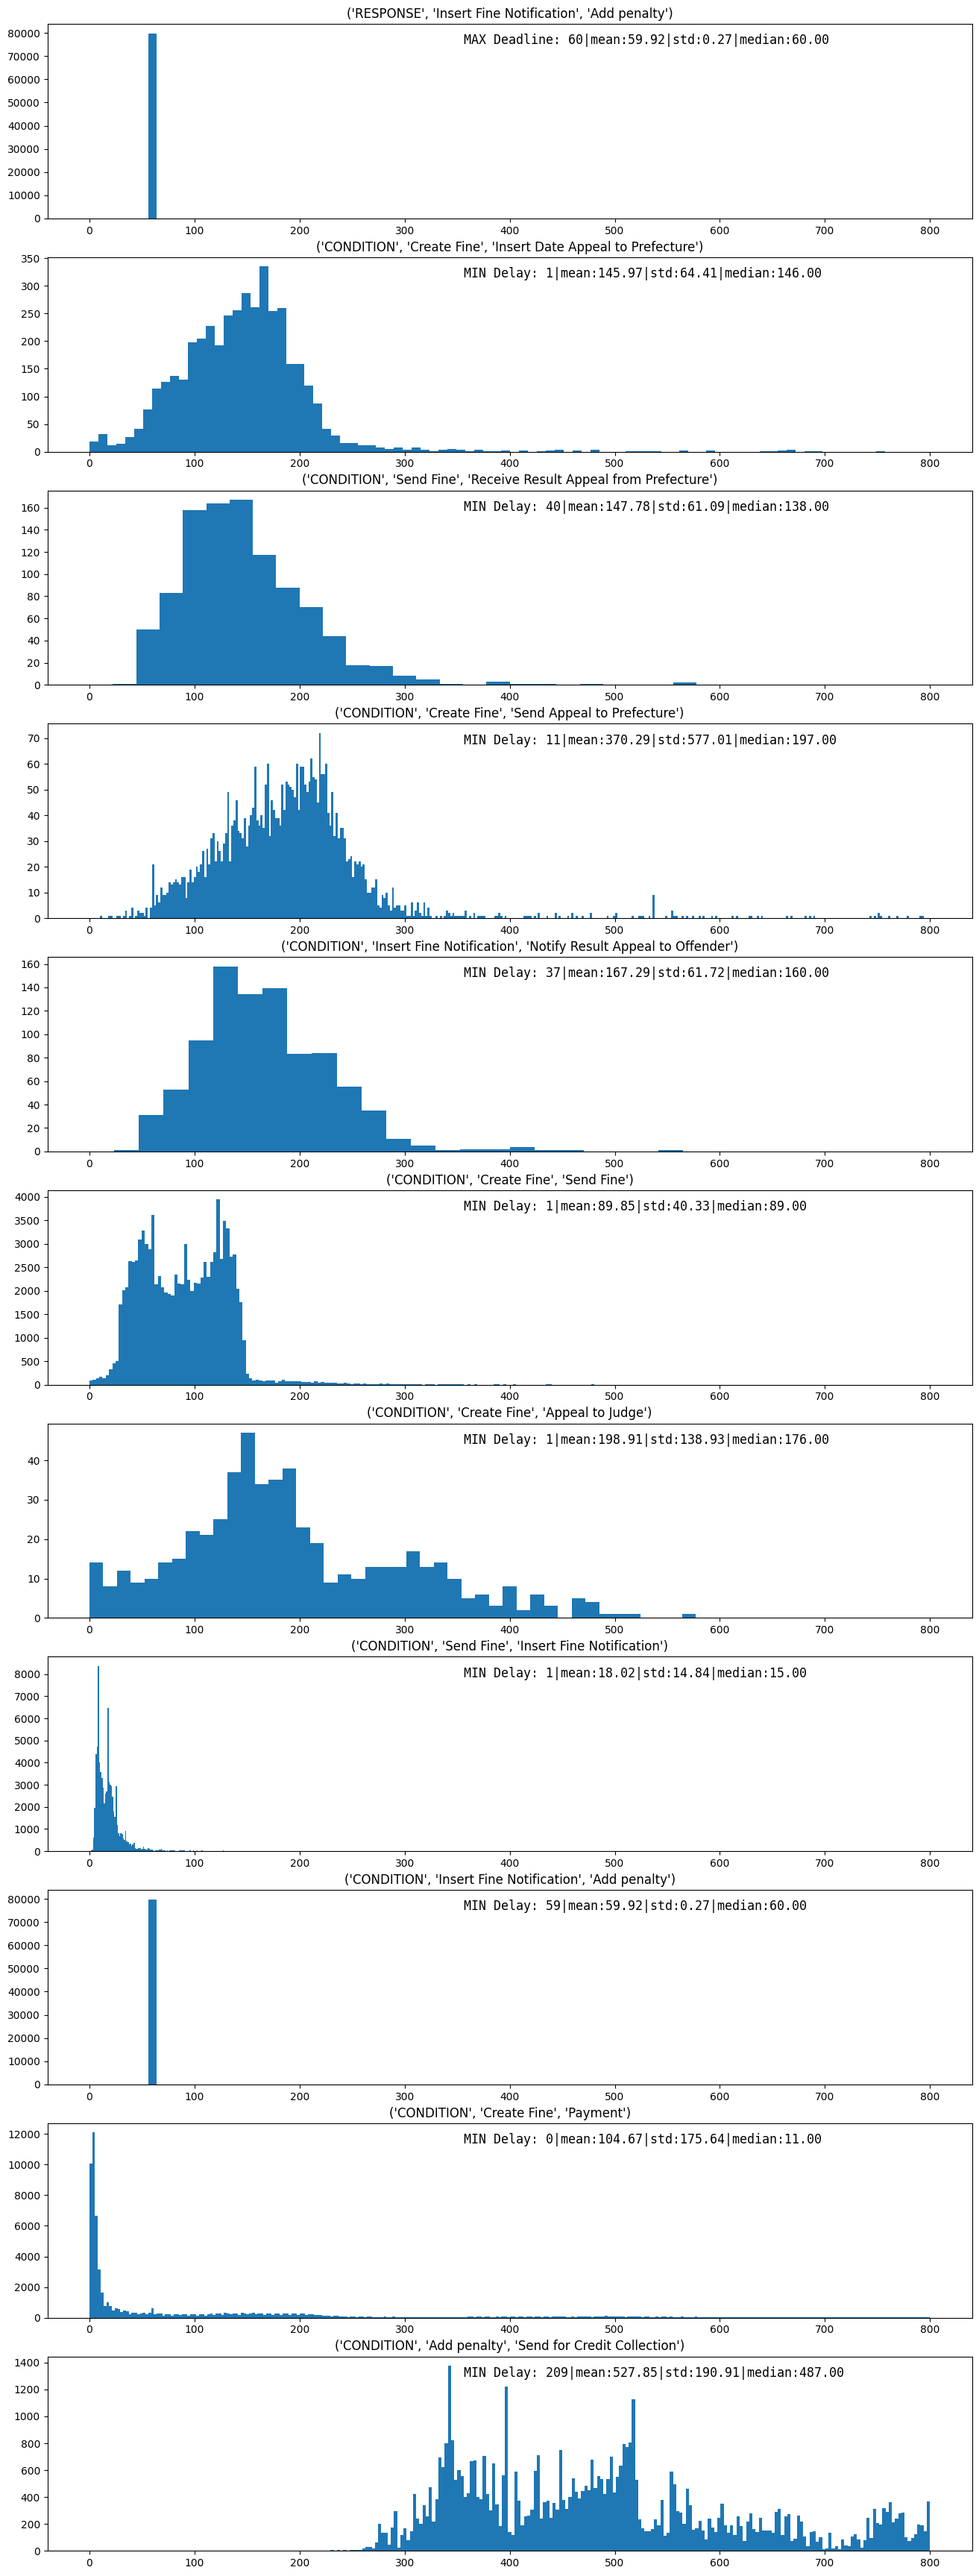

In [20]:
n = len(timings)
fig, axs = plt.subplots(nrows=n,ncols=1,figsize=(16,4*n))
i = 0

def freedman_diaconis_rule(data):
    """rule to find the bin width and number of bins from data"""
    data = np.array(data)
    if (stats.iqr(data)>0):
        bin_width = 2*stats.iqr(data) / len(data)**(1/3)
        Nbins = int(np.ceil((data.max()-data.min())/bin_width))
        return Nbins, bin_width
    else:
        return 100, 0

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
def add_text_to_ax(x_coord, y_coord, string, ax, fontsize=12, color='k'):
    """ Shortcut to add text to an ax with proper font. Relative coords."""
    ax.text(x_coord, y_coord, string, family='monospace', fontsize=fontsize,
            transform=ax.transAxes, verticalalignment='top', color=color)
    return None
xmin = 0
xmax = 800
for k,v in timings.items():
    Nbins, width = freedman_diaconis_rule(v)
    axs[i].hist(v, range=(xmin,xmax),bins=Nbins)
    axs[i].title.set_text(k)
    if k[0] == 'RESPONSE':
        text = f'MAX Deadline: {np.max(v)}'
    elif k[0] == 'CONDITION':
        text = f'MIN Delay: {np.min(v)}'
    add_text_to_ax(0.45,0.95,f'{text}|mean:{np.mean(v):.2f}|std:{np.std(v):.2f}|median:{np.median(v):.2f}',axs[i])
    i = i + 1

# Playground stuff

In [ ]:
#TODO: add a parameter for the time according to the desired output. Make sure it's in the ISO format in the DCR

In [209]:
cids = [1,1,1,1,1,1,
        2,2,2,2,2,
        3,3,3,3,3,3,3,3,3,3,
        4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
events = ['B','B','C','D','E','F',
          'A', 'B', 'E', 'F' ,'C',
          'A', 'B', 'F', 'C', 'B', 'C', 'B', 'E', 'F', 'C',
          'B','B','B','Z','B','C','B','A','C','Z','C','C','B','B','C']
timestamps = [pd.to_datetime('2021-8-02'),pd.to_datetime('2021-10-02'),pd.to_datetime('2021-10-03'),
                      pd.to_datetime('2021-10-04'),pd.to_datetime('2021-10-05'),pd.to_datetime('2021-10-06'),
                     pd.to_datetime('2021-10-01'),pd.to_datetime('2021-10-02'),pd.to_datetime('2021-10-03'),
                      pd.to_datetime('2021-10-04'),pd.to_datetime('2021-10-05'),
                     pd.to_datetime('2021-10-01'),pd.to_datetime('2021-10-02'),pd.to_datetime('2021-10-03'),
                      pd.to_datetime('2021-10-04'),pd.to_datetime('2021-10-05'),pd.to_datetime('2021-10-06'),pd.to_datetime('2021-10-07'),
                      pd.to_datetime('2021-10-08'),pd.to_datetime('2021-10-09'),pd.to_datetime('2021-10-10'),
                     pd.to_datetime('2021-9-01'),pd.to_datetime('2021-10-01'),pd.to_datetime('2021-10-03'),
                      pd.to_datetime('2021-10-04'),pd.to_datetime('2021-10-05'),pd.to_datetime('2021-10-06'),
                      pd.to_datetime('2021-10-07'),pd.to_datetime('2021-10-08'),pd.to_datetime('2021-10-09'),
                      pd.to_datetime('2021-10-10'),pd.to_datetime('2021-10-11'),pd.to_datetime('2025-10-11'),
                      pd.to_datetime('2025-10-12'),pd.to_datetime('2025-10-13'),pd.to_datetime('2025-10-14')]
test_log_dict = {
    'case:concept:name':cids,
    'concept:name':events,
    'time:timestamp':timestamps
}

test_tid = {
    'CONDITION': [['B','C']],
    'RESPONSE': [['B','C']]
}

test_log_df = pd.DataFrame(test_log_dict)
test_event_log = deepcopy(test_log_df)

In [0]:
dcr_to_rule_mapping = {'CONDITION':'DELAY','RESPONSE':'DEADLINE'}
rule_to_dcr_mapping = {'DELAY':'CONDITION','DEADLINE':'RESPONSE'}

def get_max_for_response3(temp_df):
    return temp_df[['case:concept:name','concept:name','concept:name:to','delta']].groupby('case:concept:name')['delta'].max().values

def get_max_for_response2(temp_df):
    data2 = []
    for idx, group in temp_df[['case:concept:name','concept:name','concept:name:to','delta']].groupby('case:concept:name'):
        max_days = 0
        for (te1,te2,delta) in group[['concept:name','concept:name:to','delta']].to_numpy(): # for each row
            max_days = max(max_days, delta) # store the max
            if te1 != te2: # and te1==event_pair[0] and te2==event_pair[1]: # if the events are different
                data2.append(max_days) # set the delta between the events as the max
                max_days = 0
    return data2

def get_max_for_response(temp_df):
    cids = temp_df['case:concept:name'].unique()
    for cid in cids:
        max_days = 0
        for index, row in temp_df[temp_df['case:concept:name'] == cid].iterrows():
            max_days = max(max_days, row['delta'])
            if row['concept:name'] != row['concept:name:to']:
                temp_df.loc[index, 'delta'] = max_days
                max_days = 0
    temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
    data = temp_df['delta'].values
    return data

In [211]:
[1,3,2,1,3,30,2,2,1,2,1,1]

[1, 3, 2, 1, 3, 30, 2, 2, 1, 2, 1, 1]

In [212]:
# this works for responses now it has to work for conditions

def get_response_times(log, e1, e2):
    # e1 *--> e2
    deltas = []
    for idx, g in log[log['concept:name'].isin([e1,e2])].groupby('case:concept:name'):
        g = g.sort_values(by='time:timestamp').reset_index(drop=True)
        g['time:timestamp:to'] = g['time:timestamp'].shift(-1)
        g['concept:name:to'] = g['concept:name'].shift(-1)
        g_e1 = deepcopy(g[g['concept:name']==e1])
        if len(g_e1)>1:
            g_e1 = g_e1.reset_index(drop=False)
            g_e1['index_below'] = g_e1['index'].shift(-1)
            # g_e1['time:timestamp:to'] = g_e1['time:timestamp'].shift(-1)
            g_e1 = g_e1[((g_e1['index_below']-g_e1['index'])==1)]
            g_e1['delta'] = (g_e1['time:timestamp:to'] - g_e1['time:timestamp']).dt.days
            deltas.extend(g_e1['delta'].to_numpy())
        g = g[(g['concept:name']==e1) & (g['concept:name:to']==e2)]
        g['delta'] = (g['time:timestamp:to'] - g['time:timestamp']).dt.days
        deltas.extend(g['delta'].to_numpy())
    return deltas

In [213]:
e1 = 'B'
e2 = 'C'
get_response_times(test_log_df,e1,e2)

[61, 366, 3, 2, 1, 3, 30, 2, 2, 1, 1, 2, 366]

In [172]:
test_log_df[(test_log_df['concept:name'].isin([e1,e2]) & (test_log_df['case:concept:name']==4))].reset_index(drop=True)

,case:concept:name,concept:name,time:timestamp
0,4,B,2021-09-01
1,4,B,2021-10-01
2,4,B,2021-10-03
3,4,B,2021-10-05
4,4,C,2021-10-06
5,4,B,2021-10-07
6,4,C,2021-10-09
7,4,C,2021-10-11
8,4,C,2025-10-11
9,4,B,2025-10-12


In [0]:
timings = get_timings(test_log_df, test_tid)

RESPONSE
0==1 True
1==2 True
0==2 True
[i] Done for pair RESPONSE ['O_Create Offer', 'O_Created']
CONDITION
[i] Done for pair CONDITION ['O_Created', 'O_Sent (mail and online)']
[i] Done for pair CONDITION ['O_Created', 'O_Cancelled']
[i] Done for pair CONDITION ['O_Created', 'O_Refused']
[i] Done for pair CONDITION ['O_Create Offer', 'O_Created']
[i] Done for pair CONDITION ['O_Returned', 'O_Accepted']
[i] Done for pair CONDITION ['O_Created', 'O_Sent (online only)']
[i] Done for pair CONDITION ['O_Sent (mail and online)', 'O_Returned']
[i] Done for pair CONDITION ['O_Sent (online only)', 'O_Returned']
('RESPONSE', 'O_Create Offer', 'O_Created') mean:nan median:nan
[]


/home/vco/.pyenv/versions/3.11.0/envs/pm4py-dcr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vco/.pyenv/versions/3.11.0/envs/pm4py-dcr/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


('CONDITION', 'O_Created', 'O_Sent (mail and online)') mean:0.013876646435137382 median:0.0
[0. 0. 0. ... 0. 0. 0.]
('CONDITION', 'O_Created', 'O_Cancelled') mean:23.24002296870514 median:30.0
[30.  0.  4. ... 32. 13. 30.]
('CONDITION', 'O_Created', 'O_Refused') mean:14.080298189563365 median:12.0
[11. 20. 16. ... 16. 28. 13.]
('CONDITION', 'O_Create Offer', 'O_Created') mean:0.0 median:0.0
[0. 0. 0. ... 0. 0. 0.]
('CONDITION', 'O_Returned', 'O_Accepted') mean:5.4911191084281405 median:4.0
[ 4.  0. 10. ...  0.  1. 11.]
('CONDITION', 'O_Created', 'O_Sent (online only)') mean:0.02566633761105627 median:0.0
[0. 0. 0. ... 0. 0. 0.]
('CONDITION', 'O_Sent (mail and online)', 'O_Returned') mean:8.487293462643677 median:7.0
[11.  3.  5. ...  9.  4. 19.]
('CONDITION', 'O_Sent (online only)', 'O_Returned') mean:2.9748305905130685 median:1.0
[0. 1. 0. ... 1. 1. 1.]


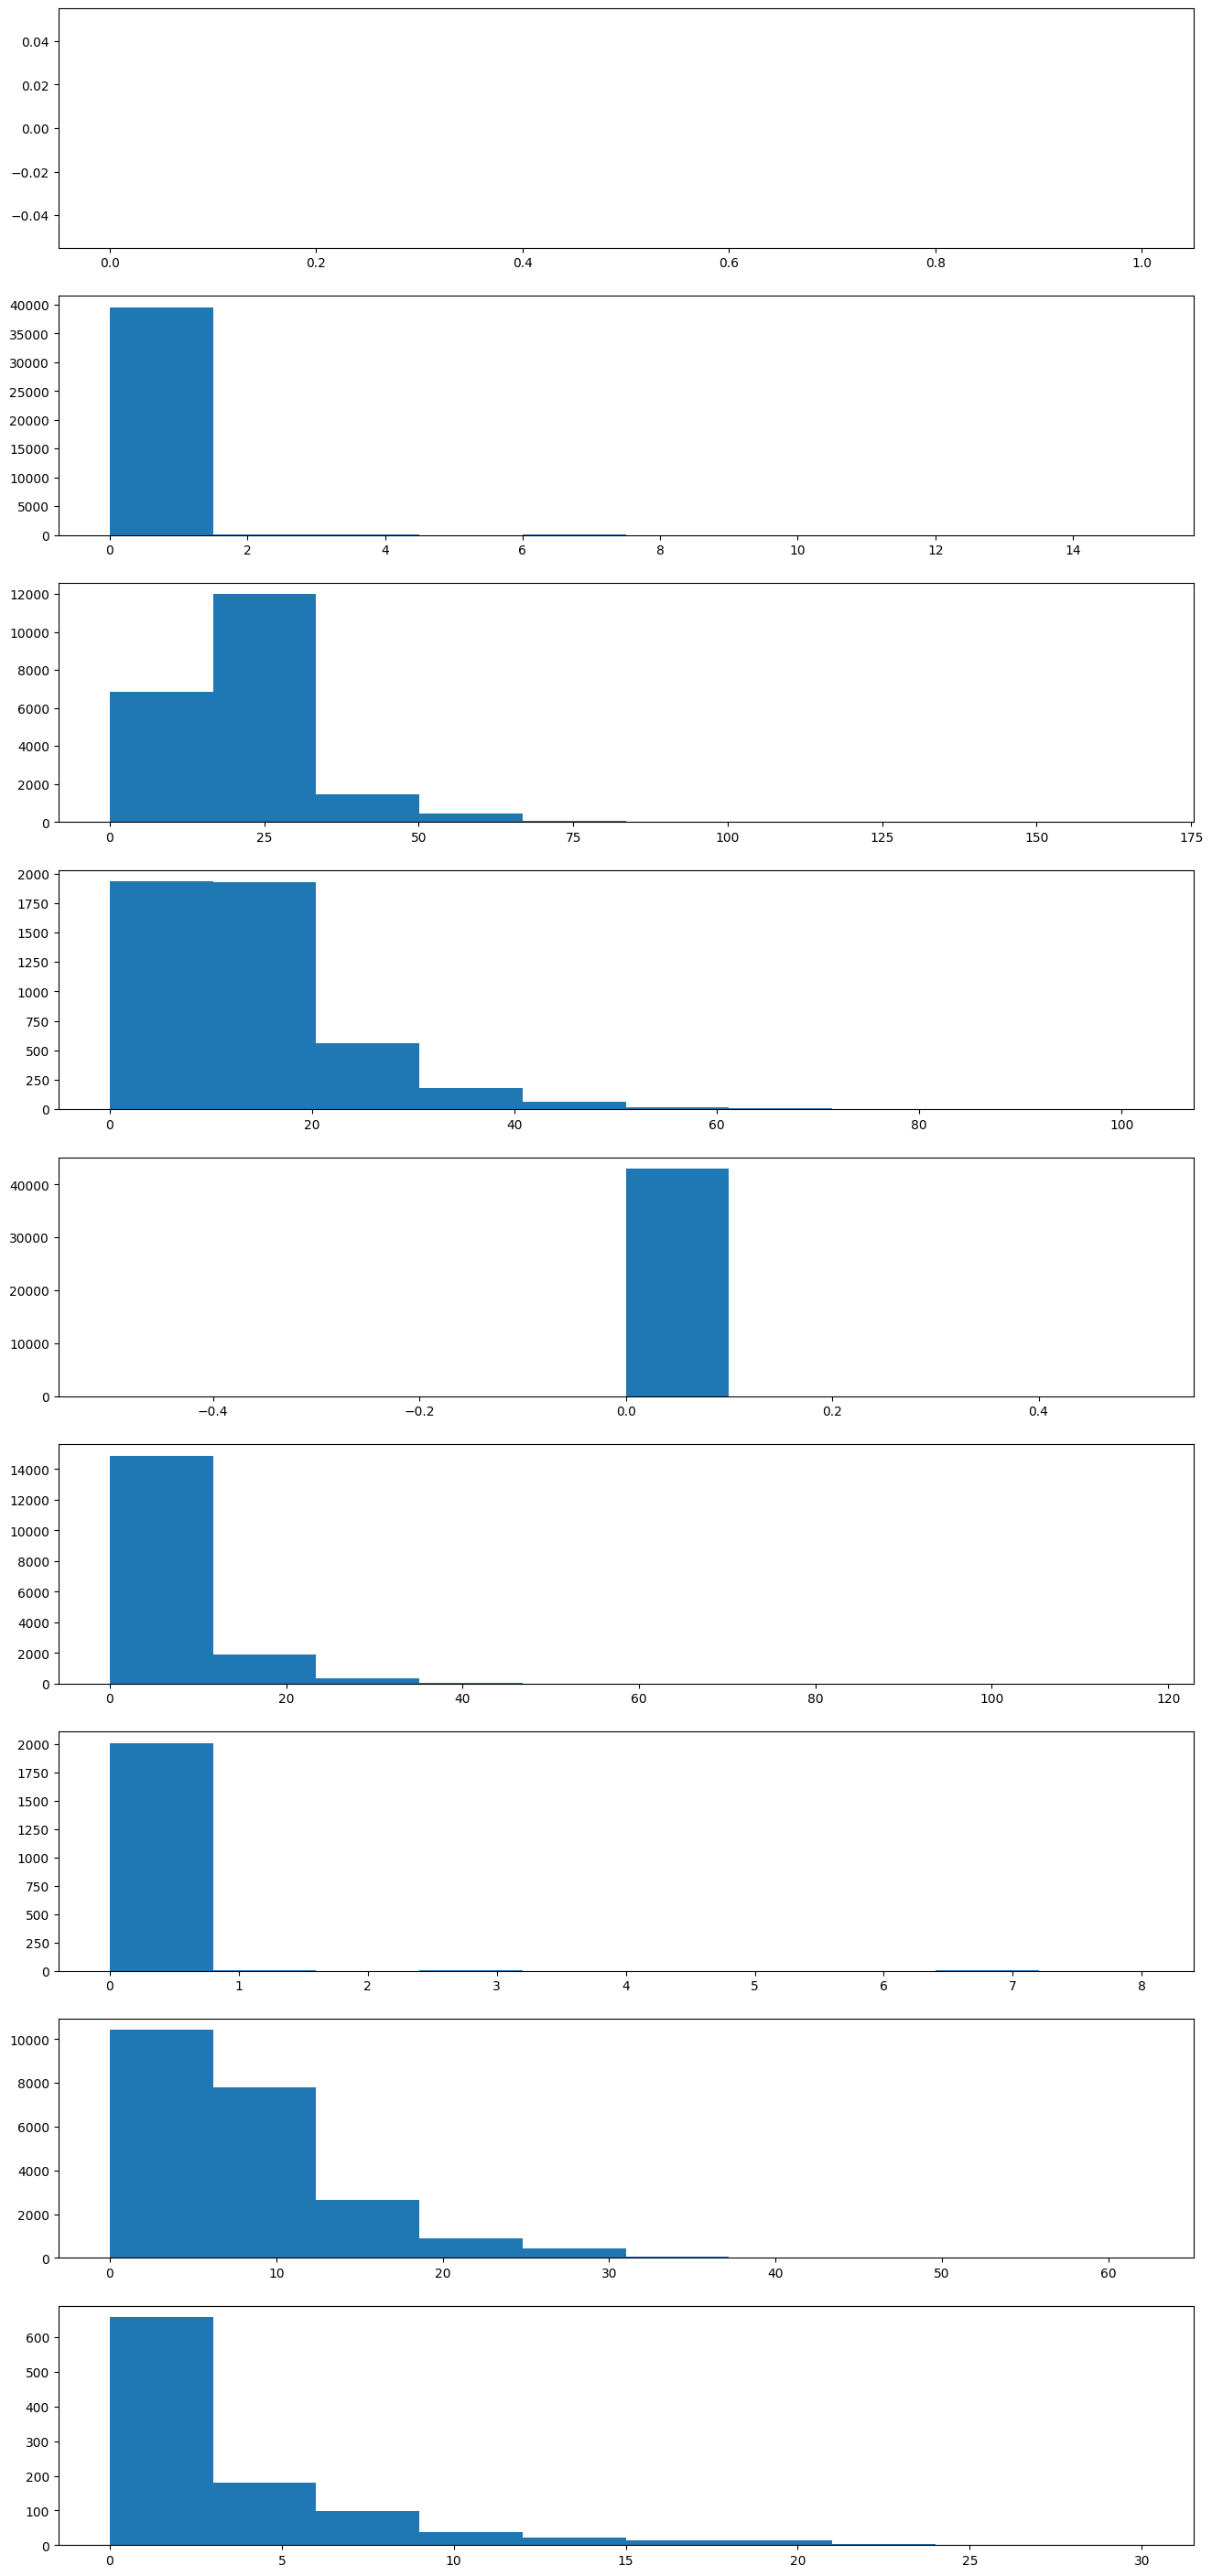

In [78]:
timedelta_unit = 'D' # only days supported for now
timing_input_dict = {}
timing_input_dict['RESPONSE'] = []
timing_input_dict['CONDITION'] = []
for e1 in reference_dcr['events']:
    for e2 in reference_dcr['events']:
        if e1 in reference_dcr['responseTo'] and e2 in reference_dcr['responseTo'][e1]:
            # print('RESPONSE',e1,e2)
            timing_input_dict['RESPONSE'].append([e1,e2])
        if e1 in reference_dcr['conditionsFor'] and e2 in reference_dcr['conditionsFor'][e1]:
            # print('CONDITION',e2,e1)
            timing_input_dict['CONDITION'].append([e2,e1])

log = event_log
if isinstance(log,pd.DataFrame):
    event_log = log
else:
    event_log = pm4py.convert_to_dataframe(log)
res = {}

for rule, event_pairs in timing_input_dict.items():
    print(rule)
    for event_pair in event_pairs:
        e1= event_pair[0]
        e2 = event_pair[1]
        first_e1 = event_log[event_log['concept:name']==e1].groupby('case:concept:name')[['case:concept:name','time:timestamp']].first().reset_index(drop=True)
        subset_is_in = first_e1.merge(event_log,on='case:concept:name',how='inner',suffixes=('_e1', ''))
        cids = subset_is_in[((subset_is_in['time:timestamp_e1']<subset_is_in['time:timestamp']) & (subset_is_in['concept:name']==e2))]['case:concept:name'].unique()
        filtered_df =  event_log[event_log['case:concept:name'].isin(cids)].copy(deep=True)

        filtered_df['time:timestamp'] = pd.to_datetime(filtered_df['time:timestamp'], utc=True)
        filtered_df = filtered_df[(filtered_df['concept:name']==event_pair[1]) |
                                   (filtered_df['concept:name']==event_pair[0])].sort_values(['case:concept:name','time:timestamp'])
        temp_df = pd.concat([filtered_df, filtered_df.groupby('case:concept:name').shift(-1)
                             .rename({'concept:name':'concept:name:to','time:timestamp':'time:timestamp:to'},axis=1)],axis=1)

        temp_df['delta'] = (temp_df['time:timestamp:to'] - temp_df['time:timestamp']).dt.days
        data = []
        if rule=='RESPONSE':
            data0 = temp_df[['case:concept:name','concept:name','concept:name:to','delta']].groupby('case:concept:name')['delta'].max().values
            data1 = []
            cids = temp_df['case:concept:name'].unique()
            for cid in cids: # for each case id
                max_days = 0
                for index, row in temp_df[temp_df['case:concept:name'] == cid].iterrows(): # for each row
                    max_days = max(max_days, row['delta']) # store the max
                    if row['concept:name'] != row['concept:name:to']: # if the events are different
                        temp_df.loc[index, 'delta'] = max_days # set the delta between the events as the max
                        max_days = 0
            temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
            data1 = temp_df['delta'].values
            data2 = []
            for idx, group in temp_df[['case:concept:name','concept:name','concept:name:to','delta']].groupby('case:concept:name'):
                max_days = 0
                for (te1,te2,delta) in group[['concept:name','concept:name:to','delta']].to_numpy(): # for each row
                    max_days = max(max_days, delta) # store the max
                    if te1 != te2: # and te1==event_pair[0] and te2==event_pair[1]: # if the events are different
                        data2.append(max_days) # set the delta between the events as the max
                        max_days = 0
            print(f'0==1 {set(data0)==set(data1)}')
            print(f'1==2 {set(data1)==set(data2)}')
            print(f'0==2 {set(data0)==set(data2)}')
        else:
            temp_df = temp_df[(temp_df['concept:name']==event_pair[0]) & (temp_df['concept:name:to']==event_pair[1])]
            data = temp_df['delta'].values
        print(f'[i] Done for pair {rule} {event_pair}')
        res[(rule,event_pair[0],event_pair[1])] = data
timings = res
n = len(timings)
fig, axs = plt.subplots(nrows=n,ncols=1,figsize=(16,4*n))
i = 0
for k,v in timings.items():
    print(f'{k} mean:{np.mean(v)} median:{np.median(v)}')
    print(v)
    axs[i].hist(v)
    i = i + 1

In [97]:
data2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [51]:
temp_df[['case:concept:name','concept:name','time:timestamp','concept:name:to','time:timestamp:to','delta']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 140761 to 27145
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   case:concept:name  1033 non-null   object             
 1   concept:name       1033 non-null   object             
 2   time:timestamp     1033 non-null   datetime64[ns, UTC]
 3   concept:name:to    1033 non-null   object             
 4   time:timestamp:to  1033 non-null   datetime64[ns, UTC]
 5   delta              1033 non-null   timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), object(3), timedelta64[ns](1)
memory usage: 56.5+ KB


In [73]:
data = []
for idx, group in temp_df[['case:concept:name','concept:name','concept:name:to','delta']].groupby('case:concept:name'):
    #group = group[['concept:name','concept:name:to','delta']].to_numpy()
    max_days = 0
    for (te1,te2,delta) in group[['concept:name','concept:name:to','delta']].to_numpy(): # for each row
        max_days = max(max_days, delta) # store the max
        if te1 != te2: # and te1==event_pair[0] and te2==event_pair[1]: # if the events are different
            data.append(max_days) # set the delta between the events as the max
            max_days = 0

In [77]:
temp_df['delta'].max()

0.0

In [75]:
temp_df['concept:name'].unique()

array(['O_Create Offer', 'O_Created'], dtype=object)

In [76]:
temp_df['concept:name:to'].unique()

array(['O_Created', nan], dtype=object)

In [68]:
temp_df[['case:concept:name','concept:name','time:timestamp','concept:name:to','time:timestamp:to','delta']]

,case:concept:name,concept:name,time:timestamp,concept:name:to,time:timestamp:to,delta
110895,Offer_1000096910,O_Create Offer,2016-08-08 14:40:11.869000+00:00,O_Created,2016-08-08 14:40:12.467000+00:00,0.0
110896,Offer_1000096910,O_Created,2016-08-08 14:40:12.467000+00:00,NaN,NaT,0.0
168141,Offer_1000145087,O_Create Offer,2016-11-12 13:37:16.174000+00:00,O_Created,2016-11-12 13:37:16.786000+00:00,0.0
168142,Offer_1000145087,O_Created,2016-11-12 13:37:16.786000+00:00,NaN,NaT,0.0
158542,Offer_1000159595,O_Create Offer,2016-10-26 17:04:31.517000+00:00,O_Created,2016-10-26 17:04:32.074000+00:00,0.0
...,...,...,...,...,...,...
38086,Offer_999829743,O_Created,2016-03-21 16:14:33.373000+00:00,NaN,NaT,NaN
75009,Offer_999976934,O_Create Offer,2016-06-10 15:17:57.292000+00:00,O_Created,2016-06-10 15:17:58.585000+00:00,0.0
75010,Offer_999976934,O_Created,2016-06-10 15:17:58.585000+00:00,NaN,NaT,NaN
171777,Offer_999982990,O_Create Offer,2016-11-19 12:34:04.340000+00:00,O_Created,2016-11-19 12:34:04.985000+00:00,0.0


In [ ]:
def get_max_for_response(temp_df):
    '''
    This method is a way to find the max response (deadline).
    Within a trace it keeps track of the max delta between either (e1,e1) or (e1,e2) pairs.
    When it reaches a (e1,e2) pair it updates the delta on that row with the max delta found in preceeding pairs.
    This means that it will either take the current row delta because this is the only occurence of (e1,e2)
    or it will take a delta from a previous pair of (e1,e1) and assign it to that pair (e1,e2)
    :param temp_df: this is a dataframe with only the event pairs (e1 and e2) where at least 1 e1 preceeds an e2 for all traces
    :return:
    '''
    cids = temp_df['case:concept:name'].unique()
    for cid in cids:
        max_days = 0
        for index, row in temp_df[temp_df['case:concept:name'] == cid].iterrows():
            max_days = max(max_days, row['delta'])
            if row['concept:name'] != row['concept:name:to']:
                temp_df.loc[index, 'delta'] = max_days
                max_days = 0
    return temp_df

## Optional: create a dummy event log with test traces

In [25]:
dict_keys = ['case:concept:name','concept:name','time:timestamp']

def create_test_traces(ordered_event_matrix):
    start_date = dt.date(2023,1,1)
    case_id = 1
    test_el = []
    for trace in ordered_event_matrix:
        date = start_date
        for event in trace:
            test_el.append({dict_keys[0]:str(case_id),dict_keys[1]:str(event),dict_keys[2]:date})
            date = date + dt.timedelta(days=1) # TODO: there could be a random sample from a distribution here
        case_id = case_id + 1
    df_test = pd.DataFrame(test_el,columns=['case:concept:name','concept:name','time:timestamp'],dtype=str)
    df_test['time:timestamp'] = pd.to_datetime(df_test['time:timestamp'])
    return pm4py.convert_to_event_log(df_test)
A,B,C,D,E,F = 'A','B','C','D','E','F'
event_log = create_test_traces([[A,C,C,B,D],[A,B,C,C,D],[A,E,F,D],[A,F,E,D],[A,B,C,D,A,E,F,D],[A,C,B,C,D,A,F,E,D]])

/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
